In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [43]:
folder_path = "../../data/output/WattsStrogatzGraphs/"
files=os.listdir(folder_path)
p=10 #Define p incase for WattsStrogatz Graphs
data0=[]
data10=[]
data20=[]
data30=[]
data40=[]
data50=[]
data60=[]
data70=[]
data80=[]
data90=[]
data100=[]

for file in files:
    with open(os.path.join(folder_path, file), 'r') as f:
        content = pd.read_csv(folder_path+"/"+file, names=['Epoch', 'Pop', 'Frac', 'DiscEdge'], skiprows=1, sep=" ")
        file=file.split('_')
        pfile=file[2]
        pfile=pfile[1:]
        #print(pfile)
        if int(p)!=int(pfile):
            continue
        content=content.drop(['Epoch', 'Pop'], axis=1)    
        last_row_content=content.iloc[-1, 0]
        if last_row_content>0.5:
            last_row_content=1-last_row_content
        if file[4]=='r0':
            data0.append(float(last_row_content))
        elif file[4]=='r10':
            data10.append(float(last_row_content))
        elif file[4]=='r20':
            data20.append(float(last_row_content))
        elif file[4]=='r30':
            data30.append(float(last_row_content))
        elif file[4]=='r40':
            data40.append(float(last_row_content))
        elif file[4]=='r50':
            data50.append(float(last_row_content))
        elif file[4]=='r60':
            data60.append(float(last_row_content))
        elif file[4]=='r70':
            data70.append(float(last_row_content))
        elif file[4]=='r80':
            data80.append(float(last_row_content))
        elif file[4]=='r90':
            data90.append(float(last_row_content))
        elif file[4]=='r100':
            data100.append(float(last_row_content))

my_dict={'0.0':data0, '0.1':data10, '0.2':data20, '0.3':data30, '0.4':data40, '0.5':data50, '0.6':data60, '0.7':data70, '0.8':data80, '0.9':data90, '1.0':data100}
print(my_dict)

{'0.0': [0.0010599999999999499, 0.0018799999999999928, 0.0012600000000000389, 0.0009799999999999809, 0.0013800000000000479, 0.0010999999999999899, 0.0012400000000000189, 0.0011799999999999589, 0.0011600000000000499, 0.0011600000000000499], '0.1': [0.0026199999999999557, 0.0023400000000000087, 0.0024600000000000177, 0.0024199999999999777, 0.0021799999999999597, 0.0020799999999999708, 0.0022600000000000398, 0.0024199999999999777, 0.0022400000000000198, 0.0019599999999999618], '0.2': [0.0048399999999999554, 0.0040999999999999925, 0.0045399999999999885, 0.0046599999999999975, 0.0042200000000000015, 0.0047199999999999465, 0.0046000000000000485, 0.00468, 0.0047000000000000375, 0.0049200000000000355], '0.3': [0.01102000000000003, 0.010260000000000047, 0.011319999999999997, 0.010759999999999992, 0.011499999999999955, 0.011159999999999948, 0.010059999999999958, 0.010379999999999945, 0.011519999999999975, 0.010440000000000005], '0.4': [0.024760000000000004, 0.02354, 0.02503999999999995, 0.024680

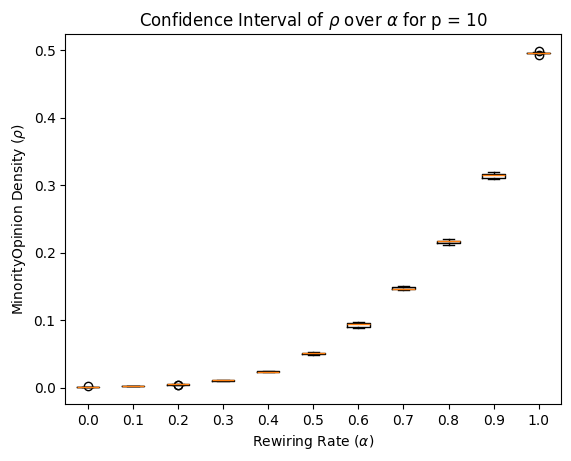

In [44]:
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_xlabel("Rewiring Rate ($\\alpha$)")
ax.set_ylabel("MinorityOpinion Density ($\\rho$)")
plt.title("Confidence Interval of $\\rho$ over $\\alpha$ for p = "+str(p))
plt.show()

In [45]:
fig.savefig("../../figures/WattsStrogatz/Box Plot p="+str(p)+".png")